In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("netflix_titles.csv")
print(df.columns)

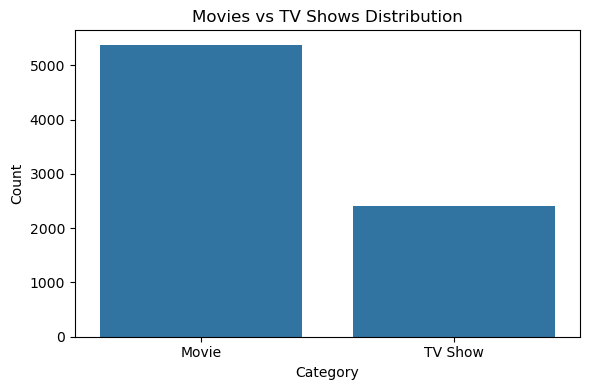

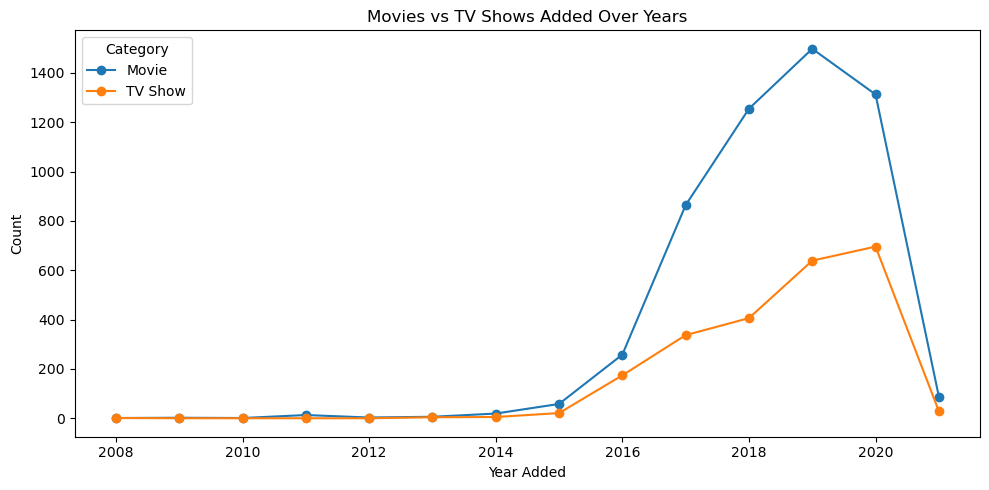

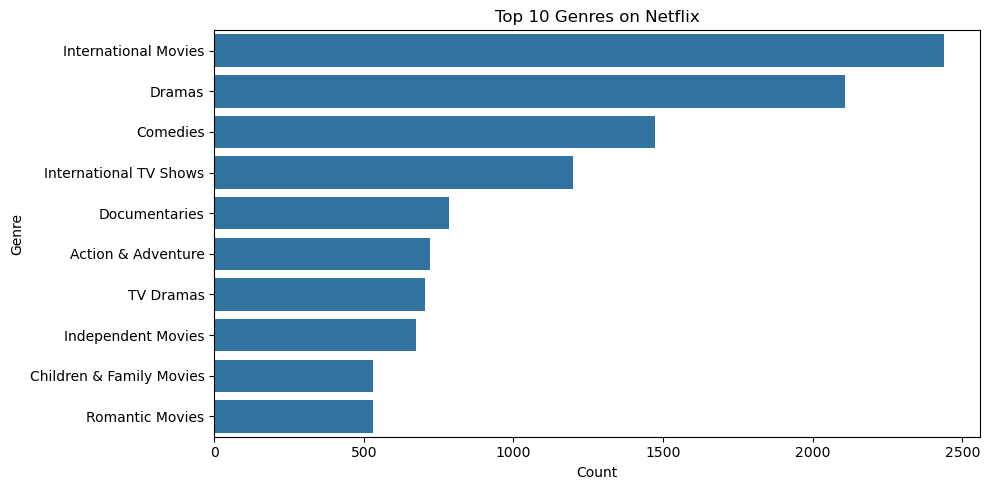

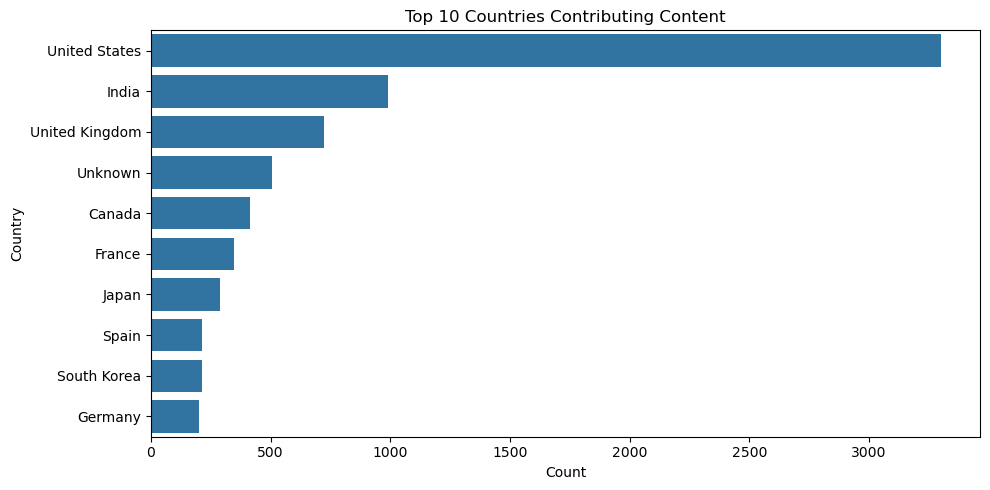

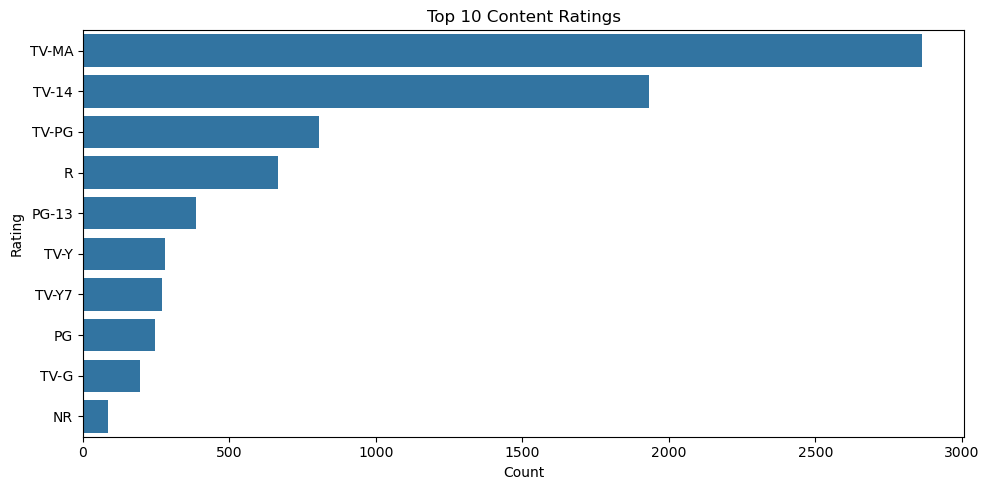

In [ ]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
df['year_added'] = df['Release_Date'].dt.year
df['month_added'] = df['Release_Date'].dt.month
df['Duration_int'] = df['Duration'].str.extract('(\d+)').astype(float)
df['Duration_type'] = df['Duration'].str.extract('([A-Za-z]+)')
df['Country'] = df['Country'].fillna('Unknown')
df['Rating'] = df['Rating'].fillna('Not Rated')
df['Type'] = df['Type'].fillna('Unknown')

type_count = df['Category'].value_counts()
year_type = df.groupby(['year_added','Category']).size().unstack().fillna(0)
top_genres = df['Type'].str.split(',').explode().str.strip().value_counts().head(10)
top_countries = df['Country'].str.split(',').explode().str.strip().value_counts().head(10)
rating_dist = df['Rating'].value_counts().head(10)

plt.figure(figsize=(6,4))
sns.barplot(x=type_count.index, y=type_count.values)
plt.title("Movies vs TV Shows Distribution")
plt.xlabel("Category"); plt.ylabel("Count"); plt.tight_layout(); plt.show()

year_type.plot(kind='line', marker='o', figsize=(10,5))
plt.title("Movies vs TV Shows Added Over Years")
plt.xlabel("Year Added"); plt.ylabel("Count"); plt.legend(title='Category'); plt.tight_layout(); plt.show()

plt.figure(figsize=(10,5))
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Count"); plt.ylabel("Genre"); plt.tight_layout(); plt.show()

plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Countries Contributing Content")
plt.xlabel("Count"); plt.ylabel("Country"); plt.tight_layout(); plt.show()

plt.figure(figsize=(10,5))
sns.barplot(x=rating_dist.values, y=rating_dist.index)
plt.title("Top 10 Content Ratings")
plt.xlabel("Count"); plt.ylabel("Rating"); plt.tight_layout(); plt.show()